In [1]:
!pwd

/home/jupyter/DeepLearning_tf2


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.1


In [21]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [22]:

# Build the model
model = tf.keras.models.Sequential([
    #initial input flatten, remember the input shape 
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    #random dense layer    
  tf.keras.layers.Dense(128, activation='relu'),
    #selecting dropout
  tf.keras.layers.Dropout(0.2),
    #select the output with 10 posibles values and multiclass softmax
  tf.keras.layers.Dense(10, activation='softmax')
])


In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
r = model.fit(x_train, 
              y_train, 
              validation_data=(x_test, y_test), 
              epochs=10)
;

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.1538 - accuracy: 0.9543 - val_loss: 0.1039 - val_accuracy: 0.9681
Epoch 2/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1119 - accuracy: 0.9664 - val_loss: 0.0912 - val_accuracy: 0.9721
Epoch 3/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0896 - accuracy: 0.9724 - val_loss: 0.0801 - val_accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0785 - accuracy: 0.9755 - val_loss: 0.0747 - val_accuracy: 0.9767
Epoch 5/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0726 - val_accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0729 - val_accuracy: 0.9794
Epoch 7/10
60000/60000 [====================

''

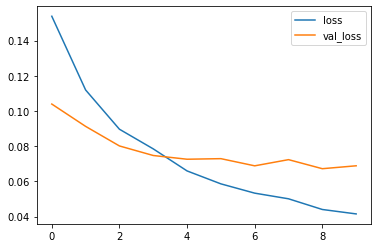

In [26]:
#plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

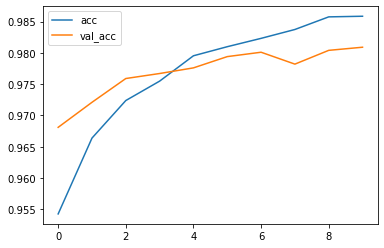

In [27]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [28]:
#evaluate the model
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 136us/sample - loss: 0.0688 - accuracy: 0.9809
[0.06884347346793511, 0.9809]


Confusion matrix, without normalization
[[ 969    1    2    0    0    1    5    1    1    0]
 [   0 1126    4    0    0    1    2    0    2    0]
 [   4    0 1015    1    2    1    1    3    4    1]
 [   0    0    4  984    2    5    0    4    4    7]
 [   0    0    2    0  967    0    4    2    1    6]
 [   0    0    0    2    0  884    2    1    2    1]
 [   2    2    0    0    5   11  933    0    5    0]
 [   1    2   13    2    1    0    0 1000    3    6]
 [   6    0    3    2    5    4    2    3  947    2]
 [   0    2    0    1    9    3    1    6    3  984]]


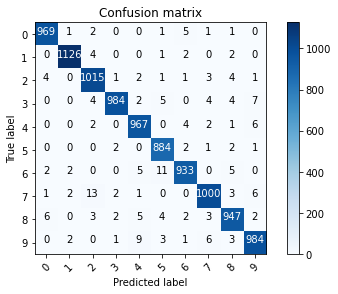

In [31]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

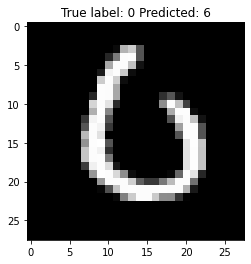

In [35]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));